**HW2: ABCD METHOD**  
Ziyad Zawawi, PHYS 427  

$\frac{B}{D} = \frac{A}{C} $ if    $ f(x, y) = f(x)*f(y) $      
$A = \int_y^ 1 \int_x^1 f(x)f(y)dxdy = (F(1) - F(x))(F(1) - F(y))$   
$B = \int_y^1  \int_0^x f(x)f(y)dxdy = (F(x) - F(0))(F(1) - F(y))$  
$C = \int_0^y \int_x^1 f(x)f(y)dxdy = (F(y) - F(0))(F(1) - F(x)$  
$D = \int_0^y \int_0^x f(x)f(y)dxdy = (F(y) - F(0))(F(x) - F(0))$  
    


$\frac{F(x) - F(0))(F(1) - F(y))}{(F(y) - F(0))(F(x) - F(0))} = \frac{(F(1) - F(x))(F(1) - F(y))}{(F(y) - F(0))(F(1) - F(x)}$

As we can see, the fractions are equal and thus proven. 

In [2]:
# Importaing libraries for our code
import numpy as np
import matplotlib.pyplot as plt 

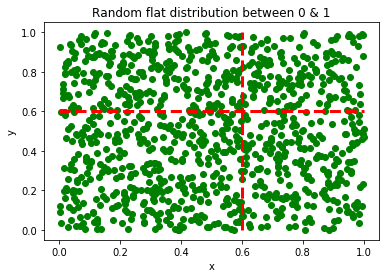

In [149]:
# Generating two random flat distributions between 0 and 1, while plotting lines at x = 0.6 & y = 0.6
x = np.random.uniform(0, 1.001, 1000)
y = np.random.uniform(0, 1.001, 1000)


plt.plot(x, y, 'go')
plt.plot([0.6, 0.6] , [0,1], 'r--', linewidth = 3)
plt.plot([0, 1] , [0.6, 0.6], 'r--', linewidth = 3)
plt.title('Random flat distribution between 0 & 1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [112]:
# Generator functions that enables us to to iterate through it to get the difference value of A 
def difference(max, z):
    n = 0
    while(n < max):
        x = np.random.uniform(0, 1.001, z)
        y = np.random.uniform(0, 1.001, z)
        
        A = np.where((x > 0.6) & (y > 0.6))
        Acou = len(np.transpose(A))

        B = np.where((x < 0.6) & (y > 0.6))
        Bcou = len(np.transpose(B))

        C = np.where((x > 0.6) & (y < 0.6))
        Ccou = len(np.transpose(C))

        D = np.where((x < 0.6) & (y < 0.6))
        Dcou = len(np.transpose(D))
        
        
        if Dcou == 0:
            n += 1
            continue
        else: 
            preA = (Bcou/Dcou) * Ccou
            
        expA = Acou
        diff = expA - preA
        n += 1
        yield diff;
        

In [139]:
# Printing the difference of when creating a random set of distributions
arraydifference = (i for i in difference(1, 1000))
for i in arraydifference:
    differenceA = i
    
print(i)

-8.802168021680217


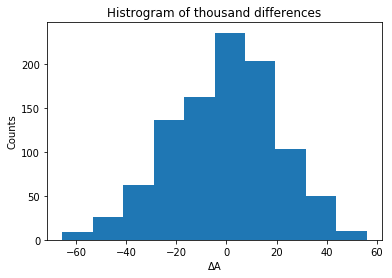

In [150]:
# Repeating the previous part a thousand times and plotting the difference array into a histogram
diffArray = []
arraydifference2 = (i for i in difference(1000, 1000))
for i in arraydifference2:
    diffArray.append(i)

plt.hist(diffArray)
plt.xlabel('\u0394A')
plt.ylabel('Counts')
plt.title('Histrogram of thousand differences')
plt.show()

Since we have a large number of data, the histrogram will be more of a gaussian

/Users/zawawi/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/zawawi/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/zawawi/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


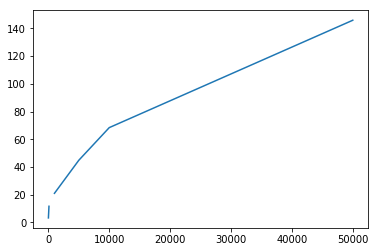

In [153]:
# Varying the size of the statistics and getting each's sigma then plotting them


# Beginning with creating the arrays that would save values of the differences
arrayDiff10 = []
arrayDiff100 = []
arrayDiff500 = []
arrayDiff1000 = []
arrayDiff5000 = []
arrayDiff10000 = []
arrayDiff50000 = []


# calling the generator function for each statistical size
array1 = (i for i in difference(1000, 10))
for i in array1:
    arrayDiff10.append(i)

array2 = (i for i in difference(1000, 100))
for i in array2:
    arrayDiff100.append(i)
    
    
array3 = (i for i in difference(1000, 500))
for i in array3:
    arrayDiff100.append(i)
    

array4 = (i for i in difference(1000, 1000))
for i in array4:
    arrayDiff1000.append(i)
    

array5 = (i for i in difference(1000, 5000))
for i in array5:
    arrayDiff5000.append(i)
    
    
array6 = (i for i in difference(1000, 10000))
for i in array6:
    arrayDiff10000.append(i)
    
    
array7 = (i for i in difference(1000, 50000))
for i in array7:
    arrayDiff50000.append(i)

# making an array of 
wholeArray = [np.std(arrayDiff10),np.std(arrayDiff100),np.std(arrayDiff500),np.std(arrayDiff1000),np.std(arrayDiff5000)
              ,np.std(arrayDiff10000),np.std(arrayDiff50000)]
# z is an array of the varied statistics 
z = [10, 100, 500,1000,5000,10000,50000]

plt.plot(z, wholeArray)
plt.title('\u03C3 vs Varied Statistics')
plt.xlabel('statistics')
plt.ylabel('\u03C3')
plt.show()